In [165]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/incident_event_logdata.csv


**Import Raw Data**

In [166]:
df = pd.read_csv('../input/incident_event_logdata.csv',delimiter=',')

#  **Exploratory Data Analysis**

In [186]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


**Data Processing / Data Munging**

In [169]:
# with the initial inspection, there are a lot of ? in data 
df.replace('?', np.NaN, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [182]:
# drop the columns that most values is nan
df1 = df.copy()
df1.drop(columns = ['cmdb_ci','problem_id','rfc','vendor','caused_by'], inplace = True)
# remove impact and urgency, since Priority value is directly computed from them.
df1.drop(columns = ['impact','urgency'], inplace = True)

In [183]:
# extract the numbers from the data 
pattern = r'(\d{1,4})'
colum = ['caller_id','opened_by','sys_created_by','sys_updated_by','location','category','subcategory','u_symptom','priority','assignment_group','assigned_to', 'closed_code', 'resolved_by']

for col in colum:
    df1[col] = df1[col].str.extract(pattern)

# check where the value is missed
#missInd = np.asarray(np.nonzero(pd.isnull(df1.caller_id.values))).flatten()
#missdf = df1[['caller_id','caller_id']].iloc[missInd,:]
#df1.head()

In [172]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

# **Data analysis**

**Distribution of columns**

In [173]:
for col in df1.columns:
    print(col, df1[col].nunique())

number 24918
incident_state 9
active 2
reassignment_count 28
reopen_count 9
sys_mod_count 115
made_sla 2
caller_id 5244
opened_by 207
opened_at 19849
sys_created_by 185
sys_created_at 11552
sys_updated_by 846
sys_updated_at 50664
contact_type 5
location 224
category 58
subcategory 254
u_symptom 525
priority 4
assignment_group 78
assigned_to 234
knowledge 2
u_priority_confirmation 2
notify 2
closed_code 17
resolved_by 216
resolved_at 18505
closed_at 2707


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<Figure size 432x288 with 0 Axes>

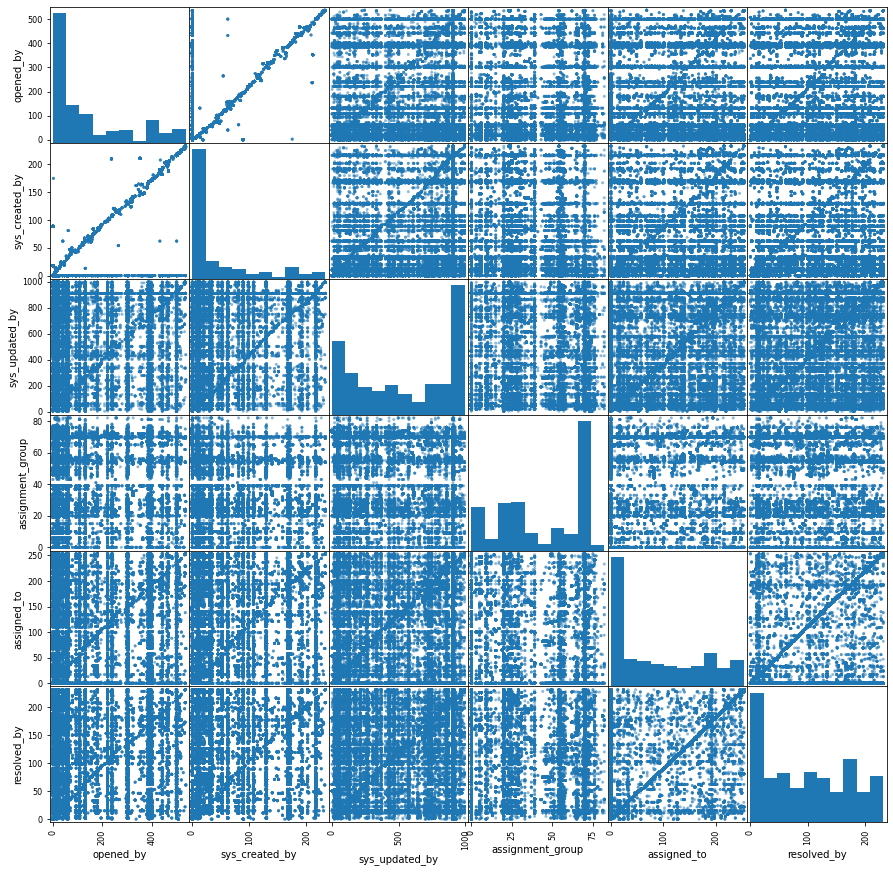

In [174]:
# Distribution and correlation among features
#%matplotlib notebook
idencolum = ['opened_by','sys_created_by','sys_updated_by','assignment_group','assigned_to','resolved_by']
timeColum = ['opened_at', 'sys_created_at','sys_updated_at','resolved_at','closed_at']
df_identify = df1[idencolum]
for col in idencolum:
    df_identify[col] = pd.to_numeric(df_identify[col], errors='coerce').fillna(0).astype(np.int64)
plt.figure()
pd.plotting.scatter_matrix(df_identify,figsize=(15,15))
plt.savefig(r"Distribution and correlation among features.png")

From the plot of scatter matrix, it can be observed that:
1. Identifier of the user who resolved the incident (resolved_by) is relative-uniformly distributed while the other features are inbalanced. 
2. It is clearly indicated that there is a linear correlation between 'opened_by' and 'sys_created_by'.
3. A vague linear line is observed in the plot between 'assigned_to' and 'resolved_by', inferring that the correlation between these two features: some CI which was initially assigned to the incident is actually the one can reslove the incident.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 432x288 with 0 Axes>

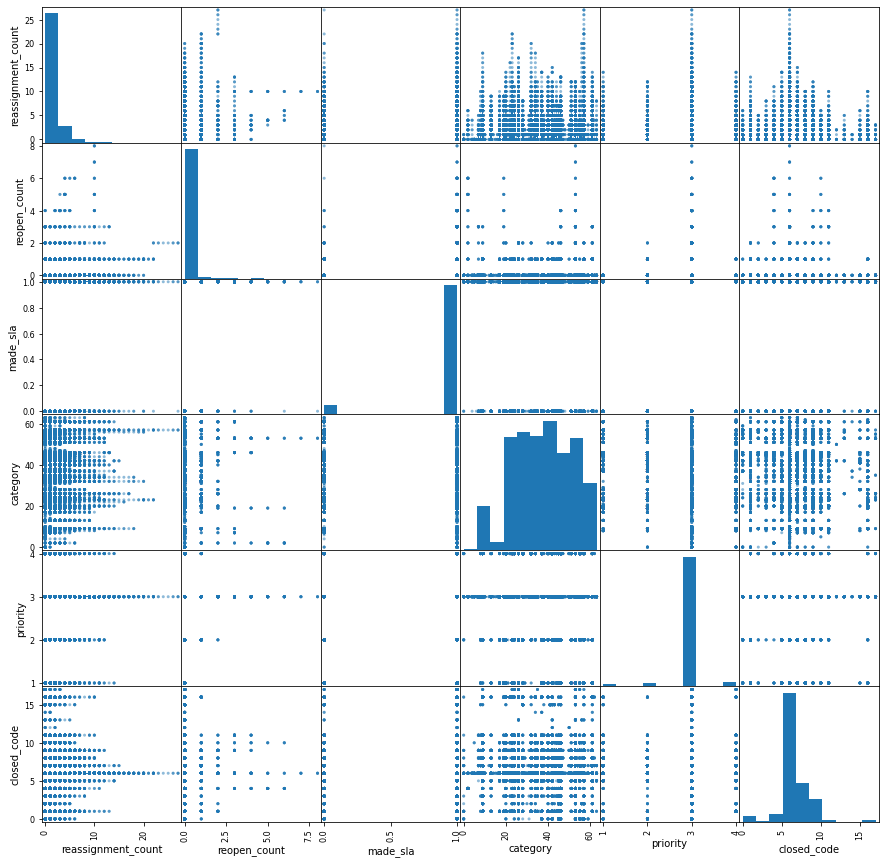

In [175]:
# continue 
othercolum = ['reassignment_count','reopen_count','made_sla','category','priority','closed_code']

df_other = df1[othercolum]
for col in othercolum:
    df_other[col] = pd.to_numeric(df_other[col], errors='coerce').fillna(0).astype(np.int64)
plt.figure()
pd.plotting.scatter_matrix(df_other,figsize=(15,15))
plt.savefig(r"Distribution and correlation among features_2.png")

Comments based on this scatter matrix plot:
1. the most of reassignment_count and reopen_count is 0. 
2. about 90% instance have SLA (service level agreement).
3. Most cases are in priority 3, i.e. moderate. Therefore, the selection of the proper metrics is important for predicting the priority of incidents.
4. the dominated closed_code is about 6-10. 
5. Data is significatnly inbalanced, so need normalize in the analysis.

**Specific Features Understanding**

Text(0.5, 1.0, 'Distribution of the incident_state')

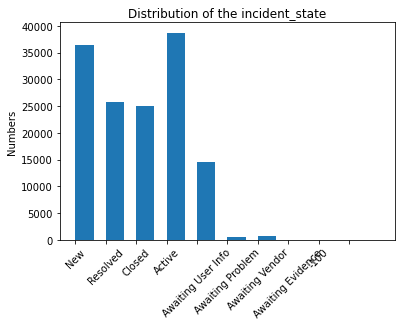

In [176]:
# incident_state
plt.figure()
bins = np.arange(0,df1.incident_state.nunique()+2,1)

ax = df1.incident_state.hist(width =0.6,bins= bins,figsize=(6,4),align='mid')
plt.xticks(rotation=45)
ax.grid(False)
ax.set_xticks(bins[:-1])
ax.set_ylabel('Numbers')
ax.set_title('Distribution of the incident_state')

From the figure, the incident can be in 7 different states as given time before it get closed. The number of 'New' and 'Active' is larger than the 'closed' case is because that the instance can be reopened in case incident resolution was rejected by the caller and in the data set there is a field i.e. reopen_count that captures the number of times got reopened.

In [177]:
# relationship between made_sla and reopen_count
sla = (df1[(df1.made_sla == True) & (df1.reopen_count>0)].groupby('number')['reopen_count'].mean()).mean()
nosla = (df1[(df1.made_sla == False) & (df1.reopen_count>0)].groupby('number')['reopen_count'].mean()).mean()
print(f'mean reopen_count for having SLA {sla} and without SLA {nosla}')

mean reopen_count for having SLA 1.1109660413687132 and without SLA 1.2403846153846154


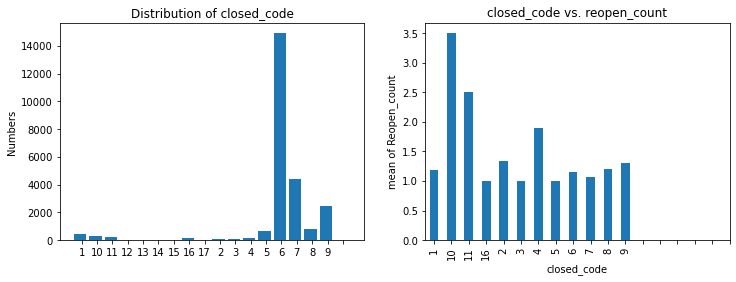

In [178]:
# Distribution of closed_code; relationship between close_code and reopen_count
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
bins=np.arange(0,df1.closed_code.nunique()+2,1)
df1[df1.incident_state=='Closed'].sort_values('closed_code').closed_code.hist(width =0.8,bins = bins,align='left',ax=ax1)
ax1.grid(False)
ax1.set_xticks(bins[:-1])
ax1.set_ylabel('Numbers')
ax1.set_title('Distribution of closed_code')


dfclosecode = df1[(df1.reopen_count>0) & (df1.incident_state=='Closed')]
dfclose_reopen = dfclosecode.groupby('closed_code').reopen_count.mean()
dfclose_reopen.plot.bar(ax=ax2)
ax2.grid(False)
ax2.set_ylabel('mean of Reopen_count')
ax2.set_xticks(bins[:-1])
ax2.set_title('closed_code vs. reopen_count')
plt.show()

From this figure, it can be observed that:
1. the dominated closed_code is 6
2. the reopen_count is 0 for closed_code = 12,13,14,15.
3. the mean reopen_count is large for closed_code 10, which means the instance resolution is easily rejected for this closed_code.

In [179]:
# assigned to and resolved by 
df_ar = df1[['assigned_to','resolved_by']]
df_ar['equal'] = np.where(df_ar.assigned_to == df_ar.resolved_by,1,0)
equal_num = df_ar['equal'].sum()
print(equal_num/df_ar.shape[0] * 100)

0.4078694817658349


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Only 0.4% of CI which was initially assigned to the incident is actually the one can reslove the incident. Hence, an accurate prediction of 'resolved_by' can significantly improve the efficiency of the incidence management process.

In [184]:
# completion time for incident resolution 
from datetime import datetime, date

df_closed = df1[df1.incident_state=='Closed'].reset_index()
df_closed.opened_at =  pd.to_datetime(df_closed.opened_at, format='%d/%m/%Y %H:%M')
df_closed.closed_at =  pd.to_datetime(df_closed.closed_at, format='%d/%m/%Y %H:%M')
df_closed['completion_time_hours'] = (df_closed.closed_at- df_closed.opened_at).dt.total_seconds()/3600
print(f'The mean of completion time for incident resolution is {df_closed.completion_time_hours.mean()} hours.')

#plots
plt.figure()
ax = df_closed['completion_time_hours'].plot(figsize=(10,4))
ax.grid(False)
ax.set_ylabel('completion time in hours')
ax.set_title('Distribution of completion_time')

The mean of completion time for incident resolution is 316.9611006603959 hours


<Figure size 432x288 with 0 Axes>

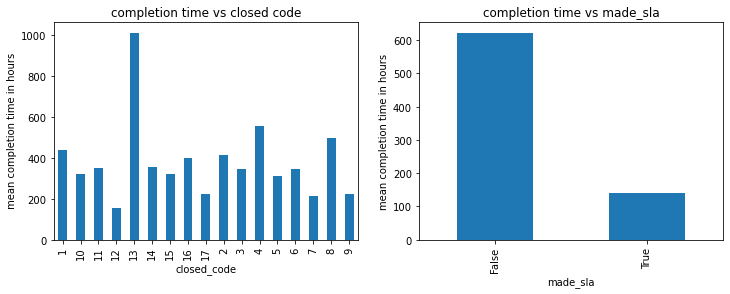

In [181]:
# completion time vs closed code; completion time vs made_sla

plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
df_closecode_time = df_closed.groupby('closed_code')['completion_time_hours'].mean()
df_closecode_time.plot.bar(ax=ax1)
ax1.grid(False)
ax1.set_ylabel(' mean completion time in hours')
ax1.set_title('completion time vs closed code')

df_made_sla_time = df_closed.groupby('made_sla')['completion_time_hours'].mean()
df_made_sla_time.plot.bar(ax=ax2)
ax2.grid(False)
ax2.set_ylabel('mean completion time in hours')
ax2.set_title('completion time vs made_sla')
plt.show()

This figure indicates that:
1. For closed_code of 13, the mean completion time is about 1000 hours, which is relative large compared to the others. This observation is unexpected since its reopen_count is 0 based on previous plot. 
2. The mean completion time for the instances without SLA is much longer than those having SLA. Therefore, making SLA would be helpful for enhancing the efficiency of incident management process.